In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
pd.set_option("display.max_columns", None)

# 폰트 설정 (Mac 사용자를 위한 예시)
plt.rcParams['font.family'] = 'AppleGothic'  # MacOS에서는 'AppleGothic'을 사용합니다.
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지지 않도록 설정합니다.

## 데이터 불러오기

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [5]:
df.isnull().sum()
## 전처리 할 건 안 보이는 듯

UID                  0
주거 형태                0
연간 소득                0
현재 직장 근속 연수          0
체납 세금 압류 횟수          0
개설된 신용계좌 수           0
신용 거래 연수             0
최대 신용한도              0
신용 문제 발생 횟수          0
마지막 연체 이후 경과 개월 수    0
개인 파산 횟수             0
대출 목적                0
대출 상환 기간             0
현재 대출 잔액             0
현재 미상환 신용액           0
월 상환 부채액             0
신용 점수                0
채무 불이행 여부            0
dtype: int64

In [6]:
df.describe()
## 체납 세금 압류 횟수가 7번인 사람.... 75%까지 0번인데 
## 신용 문제 발생 횟수가 7번인 사람도 있다..? 3분위수가 1인데
## 연체 이후 경과 개월 수가 88개월 ㄷㄷ
## 개인 파산 횟수 3..
## 월 상환 부채액의 Max와 3분위수값이 차이가 많이 나는 것으로 보임

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.00000,10000.000000,10000.000000
mean,2.163959e+06,0.199300,12.248900,19.879360,1.175265e+06,0.62620,30.889200,0.373200,5.061200e+05,3.649126e+05,22367.28075,744.215000,0.341200
std,1.434430e+06,0.714304,4.620572,7.206693,1.604199e+06,1.23419,20.011561,0.843797,2.831462e+05,3.537942e+05,15186.49738,56.995698,0.474136
min,2.676210e+05,0.000000,2.000000,6.000000,0.000000e+00,0.00000,0.000000,0.000000,2.917650e+04,0.000000e+00,0.00000,502.000000,0.000000
25%,1.311437e+06,0.000000,9.000000,14.600000,4.482476e+05,0.00000,14.000000,0.000000,3.001901e+05,1.471856e+05,10893.75000,704.000000,0.000000
50%,1.743223e+06,0.000000,12.000000,17.950000,7.670910e+05,0.00000,28.000000,0.000000,4.743412e+05,2.547930e+05,20160.00000,756.000000,0.000000
75%,2.447664e+06,0.000000,15.000000,24.100000,1.147283e+06,1.00000,41.000000,0.000000,5.919079e+05,4.749180e+05,30647.25000,793.000000,1.000000
max,1.722975e+07,7.000000,35.000000,51.700000,2.323233e+07,7.00000,88.000000,3.000000,1.373613e+06,3.946300e+06,153574.50000,825.000000,1.000000


## EDA
채무불이행 여부를 체크하기 위한 EDA를 해보자
### object type 확인

In [8]:
# 전체의 몇퍼센트가 채무 불이행을 했을까?
df['채무 불이행 여부'].value_counts()

0    6588
1    3412
Name: 채무 불이행 여부, dtype: int64

Text(0.5, 1.0, '채무 불이행 여부')

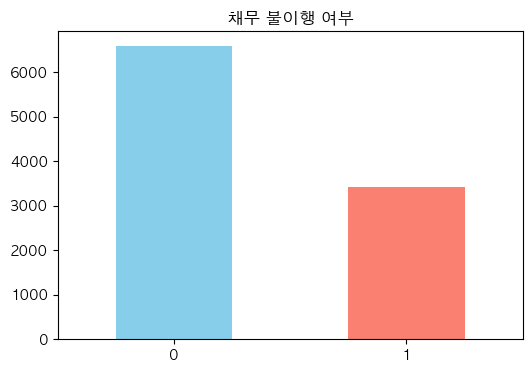

In [9]:
plt.figure(figsize=(6, 4))
df['채무 불이행 여부'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks(rotation=0)
plt.title('채무 불이행 여부')

In [10]:
# 주거형태에 따른 채무 불이행 여부 확인해보기
df[['주거 형태', '채무 불이행 여부']].value_counts().reset_index()

,주거 형태,채무 불이행 여부,0
0,주택 담보 대출 (거주 중),0,2526
1,월세,0,2491
2,월세,1,1559
3,자가,0,1507
4,주택 담보 대출 (거주 중),1,1107
5,자가,1,734
6,주택 담보 대출 (비거주 중),0,64
7,주택 담보 대출 (비거주 중),1,12


<Axes: xlabel='주거 형태', ylabel='0'>

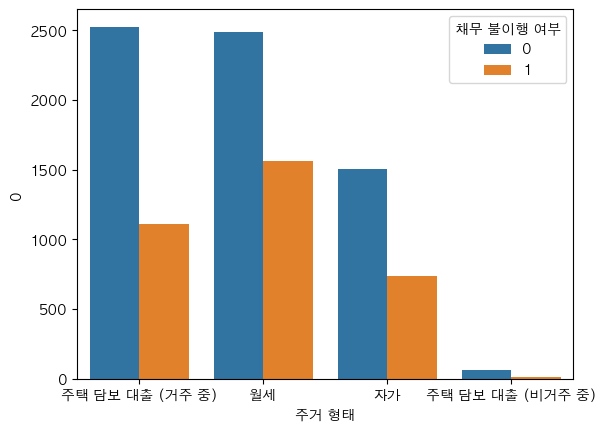

In [11]:
sns.barplot(df[['주거 형태', '채무 불이행 여부']].value_counts().reset_index(), x = '주거 형태', y = 0, hue = '채무 불이행 여부')

In [12]:
# 대출 목적에 따른 채무 불이행 여부 확인
df[['대출 목적', '채무 불이행 여부']].value_counts().reset_index()

,대출 목적,채무 불이행 여부,0
0,부채 통합,0,4387
1,부채 통합,1,2907
2,기타,0,759
3,주택 개보수,0,750
4,기타,1,211
5,사업 대출,0,207
6,주택 개보수,1,159
7,여행 자금,0,145
8,의료비,0,127
9,자동차 구매,0,82


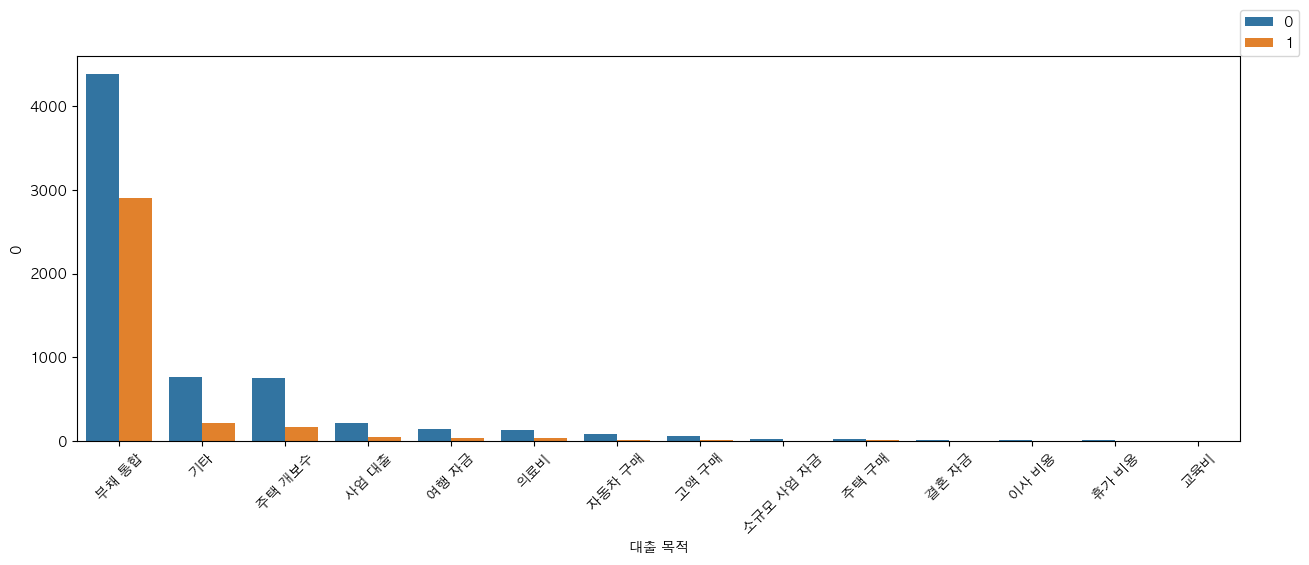

In [13]:
plt.figure(figsize  = (15,5))
sns.barplot(df[['대출 목적', '채무 불이행 여부']].value_counts().reset_index(), x = '대출 목적', y = 0, hue = '채무 불이행 여부')
plt.xticks(rotation = 45)
plt.legend(loc=(1.0, 1.0))

<Axes: xlabel='대출 상환 기간', ylabel='0'>

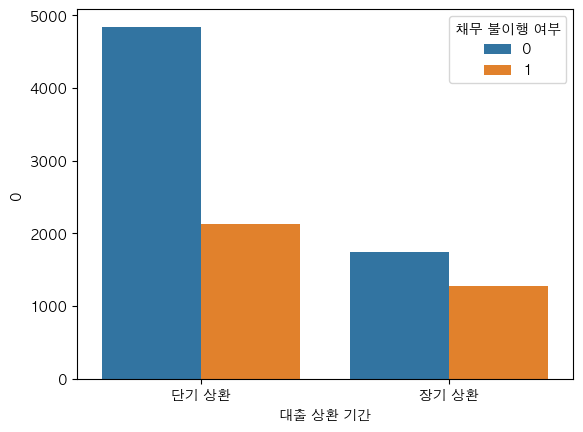

In [14]:
# 대출 상환 기간에 따른 채무 불이행 여부
sns.barplot(df[['대출 상환 기간', '채무 불이행 여부']].value_counts().reset_index(), x = '대출 상환 기간', y = 0, hue = '채무 불이행 여부')

In [15]:
# object 타입 컬럼들만 
df.dtypes[df.dtypes=='object']

UID            object
주거 형태          object
현재 직장 근속 연수    object
대출 목적          object
대출 상환 기간       object
dtype: object

<Axes: xlabel='현재 직장 근속 연수', ylabel='0'>

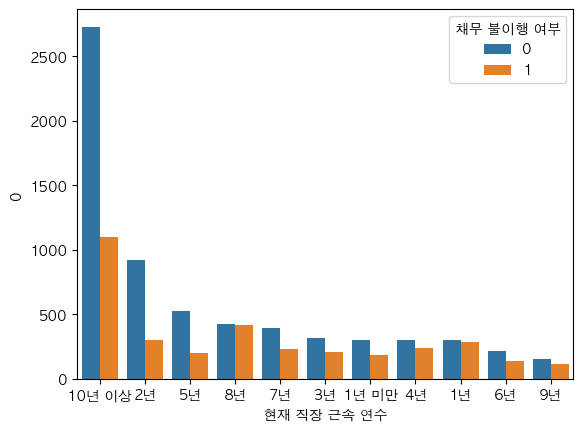

In [16]:
sns.barplot(df[['현재 직장 근속 연수', '채무 불이행 여부']].value_counts().reset_index(), x = '현재 직장 근속 연수', y = 0, hue = '채무 불이행 여부')

### 현재 직장 근속 연수는 수치화

In [18]:
## 현재 직장 근속 연수는 수치화 하는 것이 좋을 것으로 보임
df['현재 직장 근속 연수'].value_counts()

10년 이상    3828
2년        1225
8년         841
5년         729
7년         619
1년         581
4년         541
3년         523
1년 미만      488
6년         357
9년         268
Name: 현재 직장 근속 연수, dtype: int64

In [19]:
df.loc[df['현재 직장 근속 연수'] == '1년 미만', '현재 직장 근속 연수'] = '0.5년'
df['현재 직장 근속 연수'].value_counts()

10년 이상    3828
2년        1225
8년         841
5년         729
7년         619
1년         581
4년         541
3년         523
0.5년       488
6년         357
9년         268
Name: 현재 직장 근속 연수, dtype: int64

In [20]:
## 현재 직장 근속 연수는 수치화 하는 것이 좋을 것으로 보임
df['현재 직장 근속 연수_Num'] = df['현재 직장 근속 연수'].str.extract(r'(\d+)')
df.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,현재 직장 근속 연수_Num
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0,10
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0,10
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1,4
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1,6
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0,2


In [21]:
df['현재 직장 근속 연수_Num'].value_counts()

10    3828
2     1225
8      841
5      729
7      619
1      581
4      541
3      523
0      488
6      357
9      268
Name: 현재 직장 근속 연수_Num, dtype: int64

In [22]:
df.loc[df['현재 직장 근속 연수_Num'] == '0', '현재 직장 근속 연수_Num'] = '0.5'
df['현재 직장 근속 연수_Num'].value_counts()

10     3828
2      1225
8       841
5       729
7       619
1       581
4       541
3       523
0.5     488
6       357
9       268
Name: 현재 직장 근속 연수_Num, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [24]:
df['현재 직장 근속 연수_Num'] = df['현재 직장 근속 연수_Num'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [25]:
df['현재 직장 근속 연수_Num'].value_counts()

10.0    3828
2.0     1225
8.0      841
5.0      729
7.0      619
1.0      581
4.0      541
3.0      523
0.5      488
6.0      357
9.0      268
Name: 현재 직장 근속 연수_Num, dtype: int64

### 대출 상환 기간 bit화

In [27]:
# 대출 상환 기간 bit화 해주기
df['장기상환대출여부'] = df['대출 상환 기간'].apply(lambda x: 1 if x=='장기 상환' else 0)
display(df['장기상환대출여부'].value_counts())
display(df['대출 상환 기간'].value_counts())

0    6975
1    3025
Name: 장기상환대출여부, dtype: int64

단기 상환    6975
장기 상환    3025
Name: 대출 상환 기간, dtype: int64

### 대출목적 라벨인코딩 + 빈도인코딩

In [29]:
# 대출 목적 <- 레이블 인코딩 + 빈도인코딩 (사유 : 너무 많음!! ), 주거 형태 <- 원핫 인코딩 (사유: 종류 4개!!)
## 대출 목적 부터

# LabelEncoder를 객체로 생성
le = LabelEncoder()

df['대출 목적_Num'] = le.fit_transform(df['대출 목적'])

display(df['대출 목적_Num'].value_counts())
display(df['대출 목적'].value_counts())

4     7294
3      970
11     909
5      254
7      173
8      158
10      95
1       68
6       26
12      26
0       14
13       6
9        4
2        3
Name: 대출 목적_Num, dtype: int64

부채 통합        7294
기타            970
주택 개보수        909
사업 대출         254
여행 자금         173
의료비           158
자동차 구매         95
고액 구매          68
소규모 사업 자금      26
주택 구매          26
결혼 자금          14
휴가 비용           6
이사 비용           4
교육비             3
Name: 대출 목적, dtype: int64

In [30]:
df.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,현재 직장 근속 연수_Num,장기상환대출여부,대출 목적_Num
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0,10.0,0,4
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0,10.0,0,4
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1,4.0,0,4
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1,6.0,0,4
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0,2.0,1,4


In [31]:
# 대출 목적 <- 빈도 인코딩
# Train 데이터에서 빈도 계산
freq_map = df['대출 목적'].value_counts(normalize=True).to_dict()

df['대출목적_freq'] = df['대출 목적'].map(df['대출 목적'].value_counts(normalize=True))
display(df['대출목적_freq'].value_counts())
display(df['대출 목적'].value_counts(1))
display(df.head())

0.7294    7294
0.0970     970
0.0909     909
0.0254     254
0.0173     173
0.0158     158
0.0095      95
0.0068      68
0.0026      52
0.0014      14
0.0006       6
0.0004       4
0.0003       3
Name: 대출목적_freq, dtype: int64

부채 통합        0.7294
기타           0.0970
주택 개보수       0.0909
사업 대출        0.0254
여행 자금        0.0173
의료비          0.0158
자동차 구매       0.0095
고액 구매        0.0068
소규모 사업 자금    0.0026
주택 구매        0.0026
결혼 자금        0.0014
휴가 비용        0.0006
이사 비용        0.0004
교육비          0.0003
Name: 대출 목적, dtype: float64

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,현재 직장 근속 연수_Num,장기상환대출여부,대출 목적_Num,대출목적_freq
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0,10.0,0,4,0.7294
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0,10.0,0,4,0.7294
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1,4.0,0,4,0.7294
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1,6.0,0,4,0.7294
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0,2.0,1,4,0.7294


In [32]:
df.shape

(10000, 22)

In [33]:
## 주거 형태 원핫인코딩 하기
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

x_encoded = one_hot_encoder.fit_transform(df[['주거 형태']]) # 데이터 프레임형식으로 f_t해야한다!!!!! 
x_encoded_df = pd.DataFrame(x_encoded, columns=one_hot_encoder.get_feature_names_out(['주거 형태']), index=df.index)

display(x_encoded_df.head())
x_encoded_df.shape

/Users/jiwon/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중)
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


(10000, 4)

In [34]:
# 기존 데이터와 병합
df = pd.concat([df, x_encoded_df], axis=1)
print(df.shape)
df.head()

(10000, 26)


,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,현재 직장 근속 연수_Num,장기상환대출여부,대출 목적_Num,대출목적_freq,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중)
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0,10.0,0,4,0.7294,0.0,1.0,0.0,0.0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0,10.0,0,4,0.7294,1.0,0.0,0.0,0.0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1,4.0,0,4,0.7294,1.0,0.0,0.0,0.0
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1,6.0,0,4,0.7294,1.0,0.0,0.0,0.0
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0,2.0,1,4,0.7294,1.0,0.0,0.0,0.0


### numberic 타입 EDA

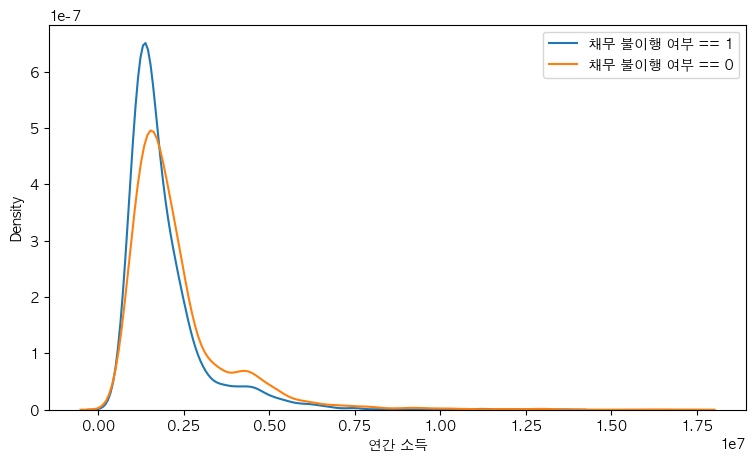

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['채무 불이행 여부'] == 1]['연간 소득'], ax=ax)
sns.kdeplot(df[df['채무 불이행 여부'] == 0]['연간 소득'], ax=ax)
plt.legend(['채무 불이행 여부 == 1', '채무 불이행 여부 == 0'])
plt.show()

#변수에 따른 밀도를 파악


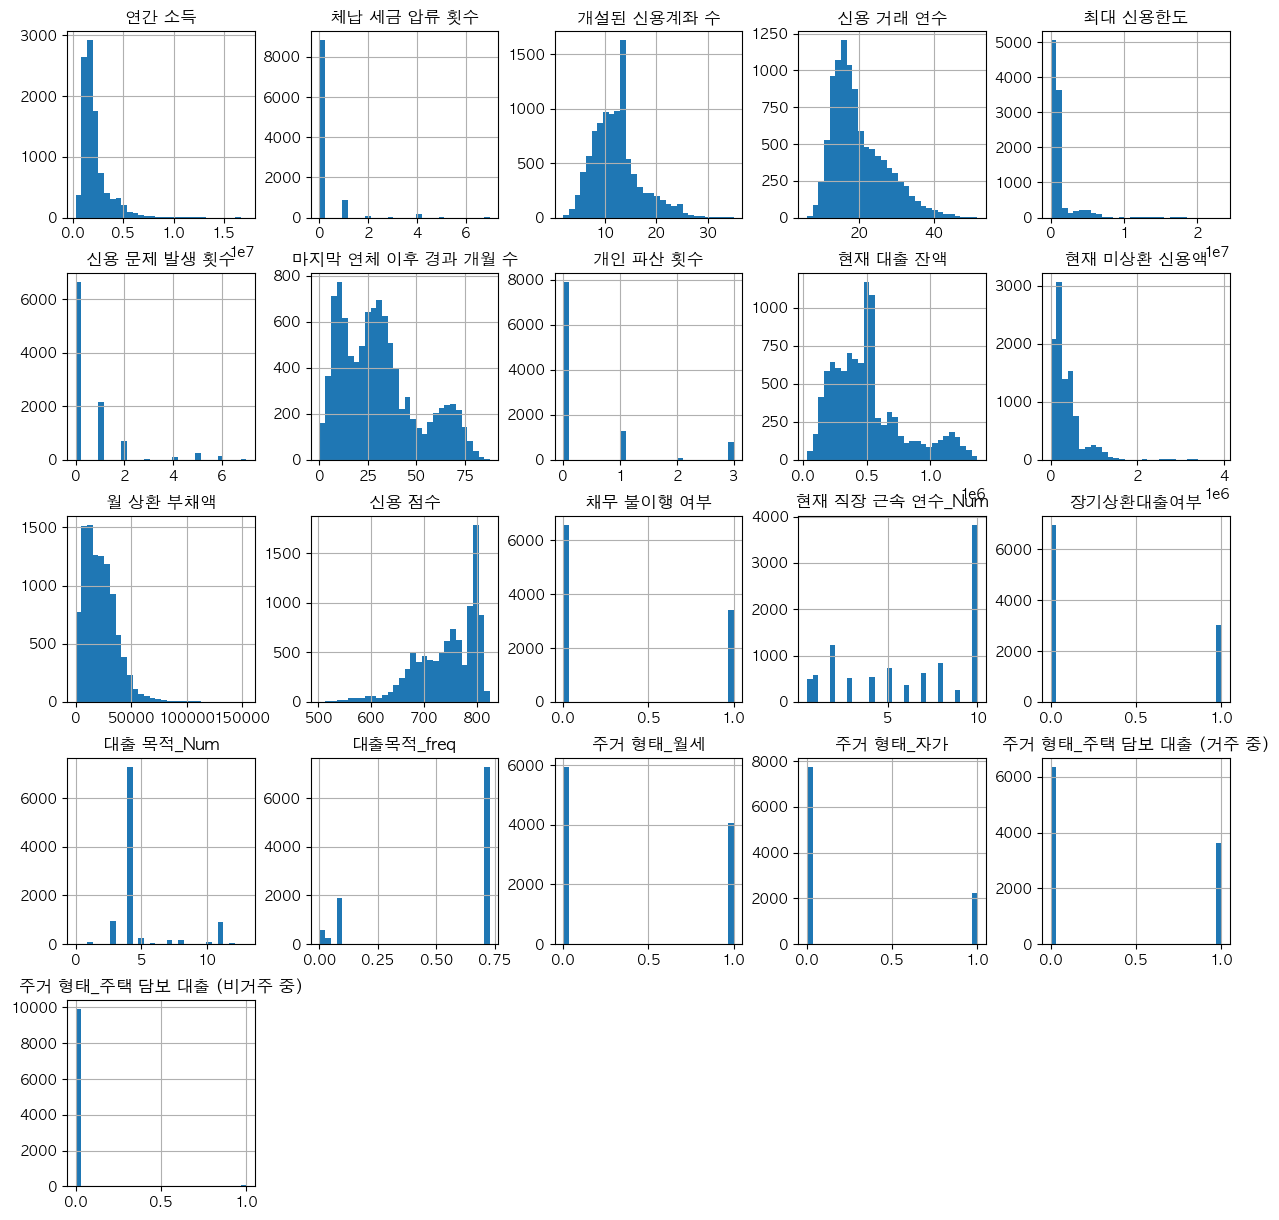

In [37]:
df.hist(bins=30, figsize = (15,15));

<Axes: >

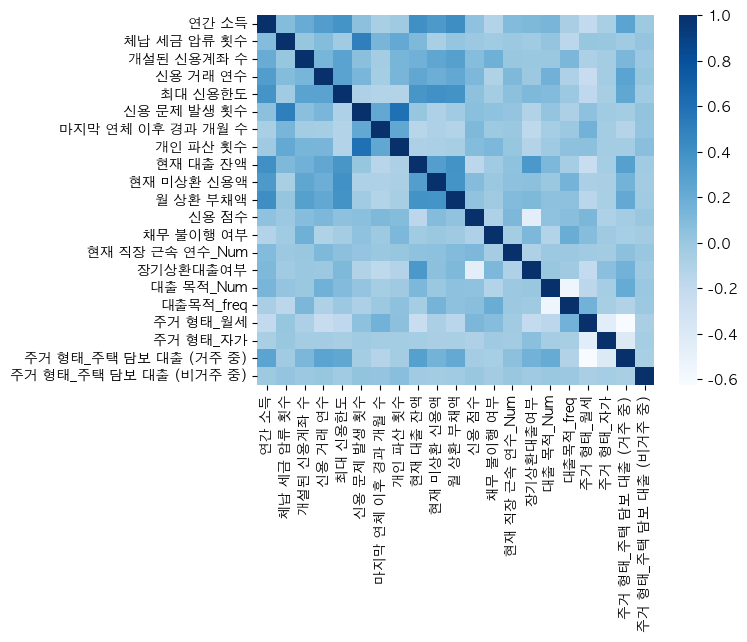

In [38]:
sns.heatmap(df.corr(), cmap = 'Blues')

In [39]:
df.corr()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,현재 직장 근속 연수_Num,장기상환대출여부,대출 목적_Num,대출목적_freq,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중)
연간 소득,1.000000,0.090106,0.201558,0.308904,0.377923,0.055681,-0.065386,-0.017336,0.403319,0.336916,0.416631,0.045491,-0.120499,0.097832,0.109321,0.135051,-0.071881,-0.201753,-0.066624,0.265234,-0.008568
체납 세금 압류 횟수,0.090106,1.000000,0.013270,0.090488,-0.031614,0.510265,0.132386,0.225035,0.109320,-0.069903,0.022609,-0.007147,-0.030419,-0.002922,-0.024957,0.028348,-0.161065,0.016209,0.008518,-0.028544,0.025557
개설된 신용계좌 수,0.201558,0.013270,1.000000,0.139979,0.271732,0.066667,-0.043846,0.138699,0.168379,0.250217,0.292177,0.079615,0.169900,0.009100,-0.001127,0.004346,0.121672,-0.085007,-0.042550,0.124687,-0.005711
신용 거래 연수,0.308904,0.090488,0.139979,1.000000,0.275284,0.128106,-0.048344,0.133616,0.233531,0.186893,0.232618,0.116424,-0.108856,0.111509,-0.004799,0.164332,-0.098843,-0.227936,-0.043340,0.268015,0.012235
최대 신용한도,0.377923,-0.031614,0.271732,0.275284,1.000000,-0.092891,-0.119547,-0.116278,0.361259,0.392104,0.379351,0.049756,-0.044997,0.055853,0.110728,0.097686,-0.007798,-0.179549,-0.059900,0.240002,-0.026631
신용 문제 발생 횟수,0.055681,0.510265,0.066667,0.128106,-0.092891,1.000000,0.227206,0.600116,0.017065,-0.093040,-0.024605,0.065530,0.044847,0.025177,-0.110826,0.028956,-0.084257,0.053298,-0.022213,-0.040769,0.031171
마지막 연체 이후 경과 개월 수,-0.065386,0.132386,-0.043846,-0.048344,-0.119547,0.227206,1.000000,0.243908,-0.144126,-0.100230,-0.117031,0.112091,-0.012058,0.002445,-0.173601,-0.049920,-0.003401,0.160203,-0.045166,-0.129046,0.025976
개인 파산 횟수,-0.017336,0.225035,0.138699,0.133616,-0.116278,0.600116,0.243908,1.000000,-0.085709,-0.082009,-0.065000,0.093226,0.115900,0.015696,-0.128475,-0.016389,0.049113,0.061455,-0.041025,-0.039880,0.070468
현재 대출 잔액,0.403319,0.109320,0.168379,0.233531,0.361259,0.017065,-0.144126,-0.085709,1.000000,0.305914,0.383477,-0.162117,-0.033052,0.044721,0.342693,0.114344,-0.048289,-0.241119,-0.049714,0.294159,-0.027432
현재 미상환 신용액,0.336916,-0.069903,0.250217,0.186893,0.392104,-0.093040,-0.100230,-0.082009,0.305914,1.000000,0.378072,0.085230,-0.000048,0.049680,0.059264,-0.000594,0.145196,-0.078974,-0.075156,0.152314,-0.036254


Text(0.5, 1.0, '대출 잔액 vs 연간 소득')

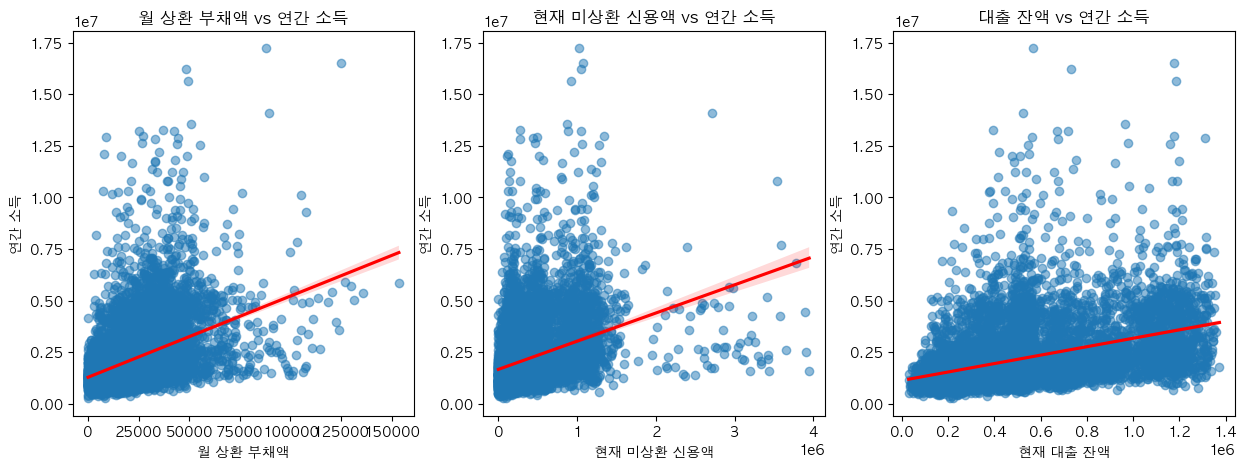

In [40]:
# 그래프 크기 설정
plt.figure(figsize=(15, 5))

# 월 상환 부채액 vs 연간 소득
plt.subplot(1, 3, 1)
sns.regplot(x=df["월 상환 부채액"], y=df["연간 소득"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("월 상환 부채액 vs 연간 소득")

# 미상환 신용액 vs 연간 소득
plt.subplot(1, 3, 2)
sns.regplot(x=df["현재 미상환 신용액"], y=df["연간 소득"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("현재 미상환 신용액 vs 연간 소득")

# 대출 잔액 vs 연간 소득
plt.subplot(1, 3, 3)
sns.regplot(x=df["현재 대출 잔액"], y=df["연간 소득"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("대출 잔액 vs 연간 소득")


Text(0.5, 1.0, '대출 잔액 vs 연간 소득')

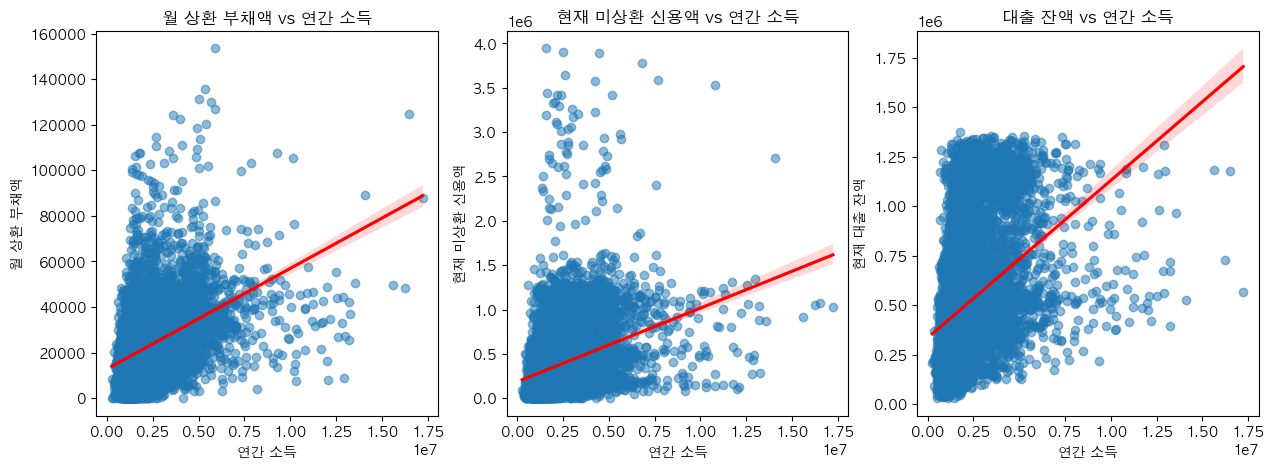

In [41]:
# 월 상환 부채액 vs 연간 소득
# 그래프 크기 설정
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.regplot(x=df["연간 소득"], y=df["월 상환 부채액"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("월 상환 부채액 vs 연간 소득")

# 미상환 신용액 vs 연간 소득
plt.subplot(1, 3, 2)
sns.regplot(x=df["연간 소득"], y=df["현재 미상환 신용액"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("현재 미상환 신용액 vs 연간 소득")

# 대출 잔액 vs 연간 소득
plt.subplot(1, 3, 3)
sns.regplot(x=df["연간 소득"], y=df["현재 대출 잔액"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("대출 잔액 vs 연간 소득")

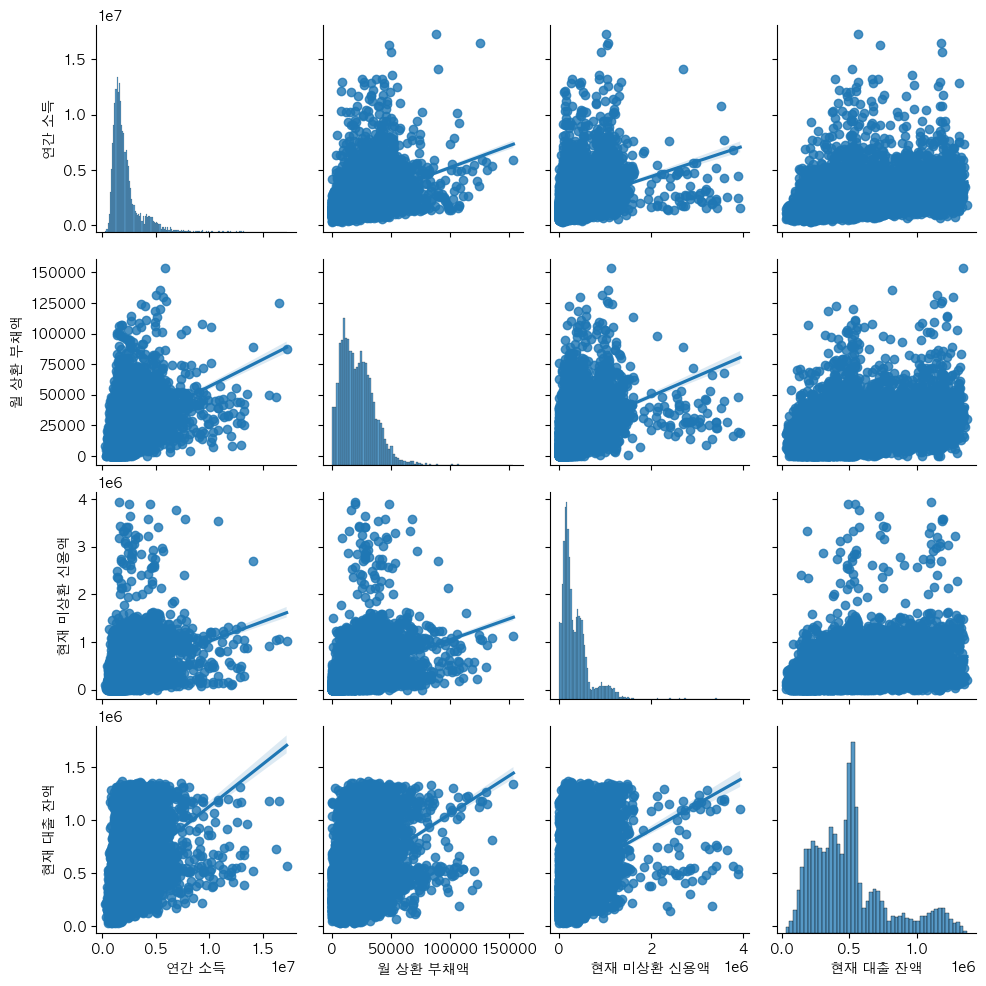

In [42]:
sns.pairplot(df[["연간 소득", "월 상환 부채액", "현재 미상환 신용액", "현재 대출 잔액"]], kind="reg")
plt.show()

In [43]:
df.select_dtypes(include=['number']).columns

Index(['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '채무 불이행 여부', '현재 직장 근속 연수_Num',
       '장기상환대출여부', '대출 목적_Num', '대출목적_freq', '주거 형태_월세', '주거 형태_자가',
       '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)'],
      dtype='object')

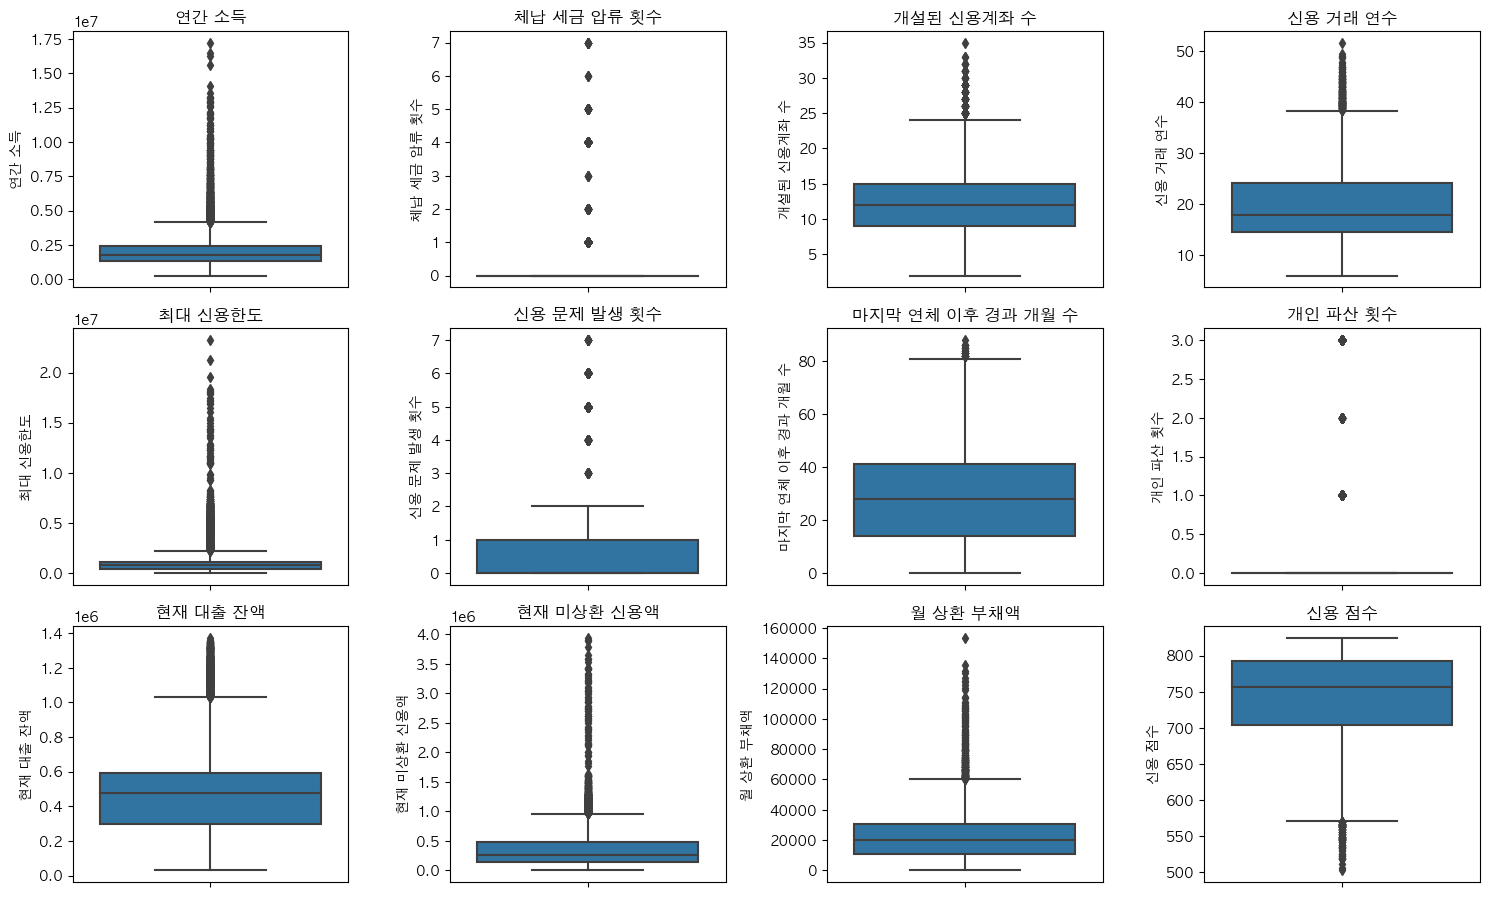

In [44]:
num_cols = ['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수']

plt.figure(figsize=(15, len(num_cols)))  # 그래프 크기 조정

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//4 + 1, 4, i)  # 3열로 정렬
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


## 수치형 데이터 로그 변환 : 연간소득, 최대 신용한도

In [46]:
df['연간 소득_log'] = np.log(df['연간 소득'])

Text(0.5, 1.0, 'Log Transformed Data')

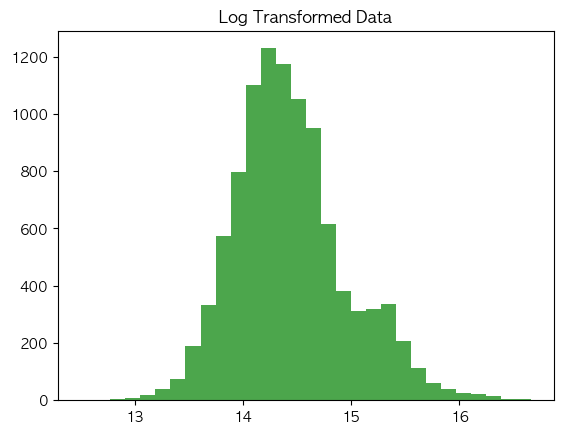

In [47]:
plt.hist(df['연간 소득_log'], bins=30, color="green", alpha=0.7)
plt.title("Log Transformed Data")

Text(0.5, 1.0, 'Log Transformed Data')

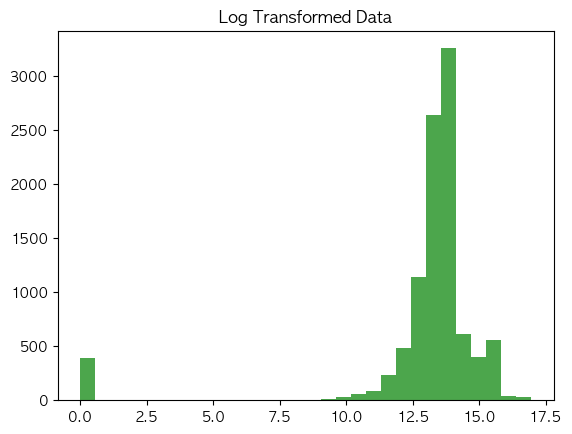

In [48]:
df['최대 신용한도_log'] = np.log(df['최대 신용한도'] + 1)
plt.hist(df['최대 신용한도_log'], bins=30, color="green", alpha=0.7)
plt.title("Log Transformed Data")

Text(0.5, 1.0, 'Boxcox Transformed Data')

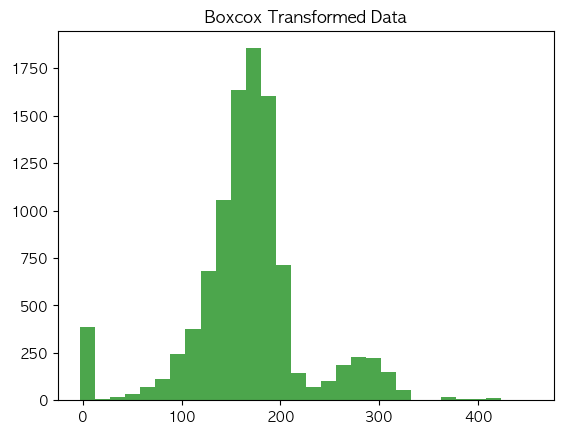

In [49]:
from scipy.stats import boxcox
df['boxcox_value'], _ = boxcox(df['최대 신용한도'] + 0.01)  # 0.01을 더해 0 방지
plt.hist(df['boxcox_value'], bins=30, color="green", alpha=0.7)
plt.title("Boxcox Transformed Data")

In [50]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
df['quantile_value'] = qt.fit_transform(df[['최대 신용한도']])

Text(0.5, 1.0, 'Quantile Transformed Data')

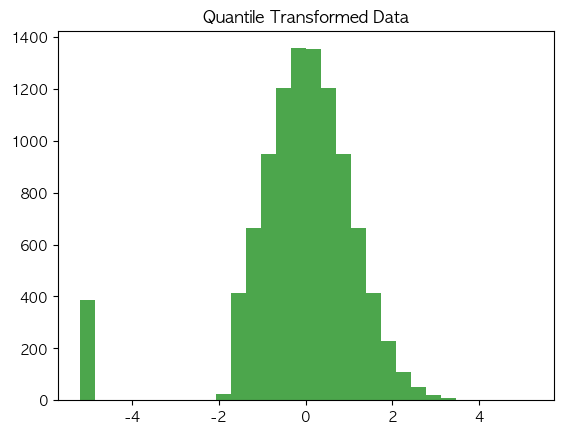

In [51]:
plt.hist(df['quantile_value'], bins=30, color="green", alpha=0.7)
plt.title("Quantile Transformed Data")

In [52]:
Q1 = df['최대 신용한도'].quantile(0.25)
Q3 = df['최대 신용한도'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준 설정 (IQR 1.5배 이상 벗어난 값)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 개수 확인
outliers = df[(df['최대 신용한도'] < lower_bound) | (df['최대 신용한도'] > upper_bound)]
print(f"이상치 개수: {len(outliers)}")

이상치 개수: 1045


In [53]:
outliers

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,현재 직장 근속 연수_Num,장기상환대출여부,대출 목적_Num,대출목적_freq,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중),연간 소득_log,최대 신용한도_log,boxcox_value,quantile_value
13,TRAIN_00013,주택 담보 대출 (거주 중),4910103.0,10년 이상,0.0,13,33.9,4898010.0,0,34,0,부채 통합,단기 상환,1127766.0,869257.5,109195.5,751,1,10.0,0,4,0.7294,0.0,0.0,1.0,0.0,15.406805,15.404340,288.654128,1.694219
20,TRAIN_00020,주택 담보 대출 (거주 중),4861900.5,7년,0.0,10,39.2,5406213.0,0,12,0,주택 개보수,장기 상환,684924.0,146569.5,50541.0,736,0,7.0,1,11,0.0909,0.0,0.0,1.0,0.0,15.396940,15.503060,297.068920,1.865912
27,TRAIN_00027,주택 담보 대출 (거주 중),3061012.5,10년 이상,0.0,19,31.4,4811965.5,0,8,0,부채 통합,장기 상환,966484.5,808713.0,34456.5,676,1,10.0,1,4,0.7294,0.0,0.0,1.0,0.0,14.934256,15.386616,287.168543,1.677083
37,TRAIN_00037,자가,2383923.0,10년 이상,0.0,10,30.5,3357504.0,0,26,0,부채 통합,단기 상환,143592.0,89298.0,8856.0,764,0,10.0,0,4,0.7294,0.0,1.0,0.0,0.0,14.684258,15.026709,258.582946,1.363505
61,TRAIN_00061,주택 담보 대출 (거주 중),2690202.0,10년 이상,0.0,14,15.1,2524911.0,0,11,0,부채 통합,단기 상환,535747.5,202657.5,30609.0,784,0,10.0,0,4,0.7294,0.0,0.0,1.0,0.0,14.805127,14.741717,237.956098,1.276218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,TRAIN_09968,주택 담보 대출 (거주 중),2228571.0,10년 이상,1.0,8,27.7,3814894.5,2,13,0,주택 개보수,단기 상환,544030.5,222795.0,48156.0,804,0,10.0,0,11,0.0909,0.0,0.0,1.0,0.0,14.616871,15.154424,268.389696,1.445999
9972,TRAIN_09972,자가,1688668.5,10년 이상,0.0,7,23.7,3547134.0,0,57,0,부채 통합,단기 상환,357673.5,264318.0,33793.5,798,0,10.0,0,4,0.7294,0.0,1.0,0.0,0.0,14.339451,15.081651,262.757618,1.393493
9974,TRAIN_09974,주택 담보 대출 (거주 중),7231182.0,10년 이상,0.0,13,27.5,5072043.0,0,33,0,주택 개보수,단기 상환,1039843.5,1080112.5,56985.0,807,0,10.0,0,11,0.0909,0.0,0.0,1.0,0.0,15.793913,15.439254,291.602952,1.750096
9982,TRAIN_09982,주택 담보 대출 (거주 중),2752522.5,2년,1.0,12,29.8,5550952.5,0,66,0,부채 통합,단기 상환,419763.0,290055.0,26527.5,802,0,2.0,0,4,0.7294,0.0,0.0,1.0,0.0,14.828028,15.529480,299.361827,1.911642


# 모델링

### lgbm

In [56]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split


In [57]:
df.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부', '현재 직장 근속 연수_Num', '장기상환대출여부', '대출 목적_Num', '대출목적_freq',
       '주거 형태_월세', '주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)',
       '주거 형태_주택 담보 대출 (비거주 중)', '연간 소득_log', '최대 신용한도_log', 'boxcox_value',
       'quantile_value'],
      dtype='object')

In [58]:
# train 데이터 정리
cols = ['체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', 
          '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
          '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
          '현재 직장 근속 연수_Num', '장기상환대출여부', '대출목적_freq',
          '주거 형태_월세','주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)',
          '연간 소득_log', 'quantile_value']
train = df[cols]

In [59]:
train.shape

(10000, 19)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, df['채무 불이행 여부'], 
                                                    stratify=df['채무 불이행 여부'],
                                                    test_size=0.1, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9000, 19), (1000, 19), (9000,), (1000,))

In [61]:
y_train.value_counts(1)

0    0.658778
1    0.341222
Name: 채무 불이행 여부, dtype: float64

In [62]:
y_test.value_counts(1)

0    0.659
1    0.341
Name: 채무 불이행 여부, dtype: float64

In [63]:
lgb = LGBMClassifier(object='binary',
                     n_estimators=100,
                     early_stopping_rounds = 50,
                     learning_rate=0.03,
                     num_leaves=64, 
                     max_depth=-1, 
                     random_state=42, 
                     verbose=-1)
lgb

LGBMClassifier(early_stopping_rounds=50, learning_rate=0.03, num_leaves=64,
               object='binary', random_state=42, verbose=-1)

In [64]:
lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred_lgb = lgb.predict_proba(X_test)[:,1]

ROC-AUC Score: 0.7425


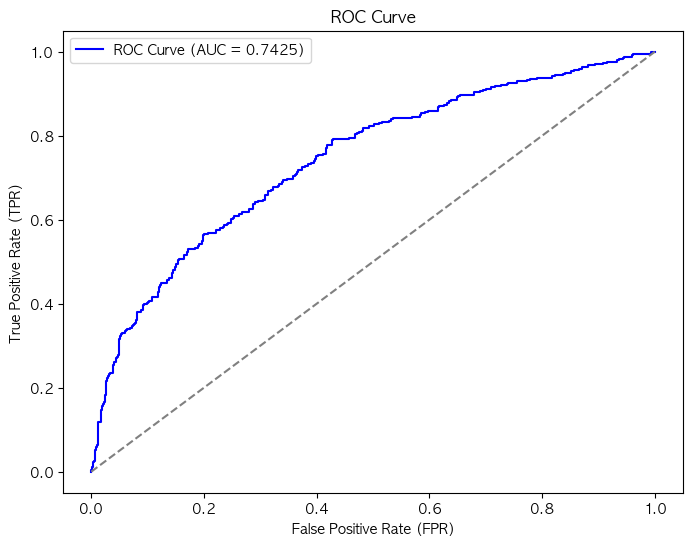

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 실제 값(y_test)와 예측 확률(y_pred_proba)을 사용하여 ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_lgb)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_lgb)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # 랜덤 분류 기준선
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

### 랜덤포레스트

In [67]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,
                               criterion='gini',
                               max_depth=None,
                               random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred_rf = rfc.predict_proba(X_test)[:,1]

ROC-AUC Score: 0.7320


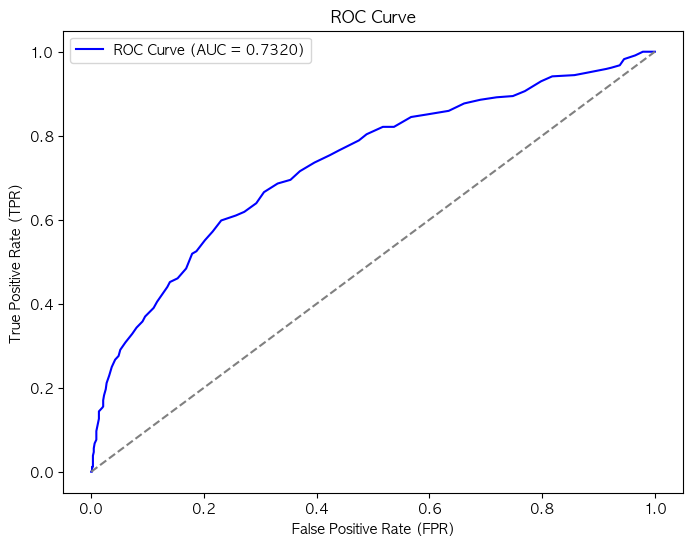

In [69]:
# 실제 값(y_test)와 예측 확률(y_pred_proba)을 사용하여 ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_rf)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # 랜덤 분류 기준선
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

### xgboost

In [71]:
# !pip install xgboost
import xgboost as xgb
# !conda install -c conda-forge xgboost

In [72]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # 이진 분류
    eval_metric='auc',  # 평가 지표 AUC 사용
    use_label_encoder=False,
    n_estimators=100,  # 트리 개수
    learning_rate=0.1,  # 학습률
    max_depth=6,  # 트리 깊이
    subsample=0.8,  # 샘플링 비율
    colsample_bytree=0.8,  # 컬럼 샘플링 비율
    random_state=42
)

# 모델 학습
xgb_model.fit(X_train, y_train)

/Users/jiwon/anaconda3/envs/torch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [73]:
y_pred_xgb = xgb_model.predict_proba(X_test)[:,1]

ROC-AUC Score: 0.7318


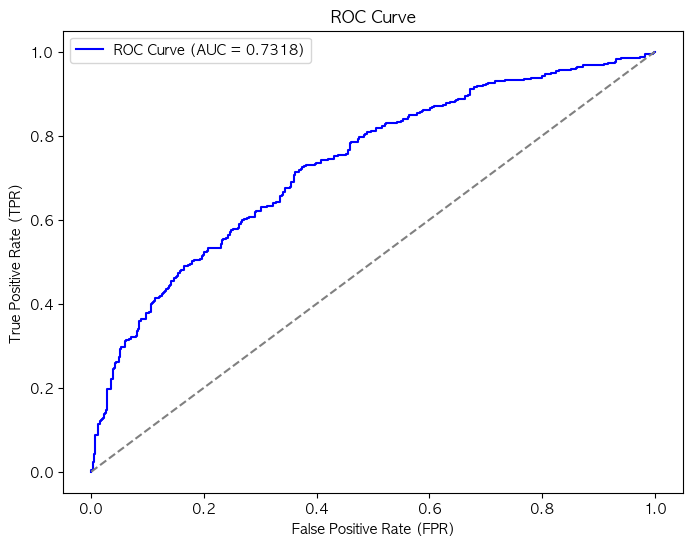

In [74]:
# 실제 값(y_test)와 예측 확률(y_pred_proba)을 사용하여 ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_xgb)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # 랜덤 분류 기준선
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

## test 셋 변환

In [76]:
test = pd.read_csv('data/test.csv')
print(test.shape)
test.head()

(2062, 17)


,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,TEST_0000,월세,1560090.0,10년 이상,0.0,13,12.0,495561.0,0,18,0,기타,단기 상환,376332.0,133522.5,29641.5,736
1,TEST_0001,주택 담보 대출 (거주 중),2102616.0,2년,0.0,9,29.0,580833.0,0,40,0,부채 통합,장기 상환,830379.0,302983.5,20151.0,718
2,TEST_0002,주택 담보 대출 (거주 중),2477989.5,10년 이상,0.0,11,26.5,995841.0,0,44,0,부채 통합,장기 상환,877635.0,379278.0,13113.0,722
3,TEST_0003,주택 담보 대출 (거주 중),1571091.0,6년,0.0,7,34.4,601656.0,0,45,0,부채 통합,단기 상환,487278.0,275395.5,11679.0,762
4,TEST_0004,주택 담보 대출 (거주 중),2290260.0,10년 이상,0.0,19,25.0,1954623.0,0,14,0,부채 통합,단기 상환,397782.0,742767.0,42370.5,775


In [77]:
# 현재 직장 근속 연수 변경해주기
test.loc[df['현재 직장 근속 연수'] == '1년 미만', '현재 직장 근속 연수'] = '0.5년'
test['현재 직장 근속 연수_Num'] = test['현재 직장 근속 연수'].str.extract(r'(\d+)')
test.loc[test['현재 직장 근속 연수_Num'] == '0', '현재 직장 근속 연수_Num'] = '0.5'
test['현재 직장 근속 연수_Num'] = test['현재 직장 근속 연수_Num'].astype('float')

test.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,현재 직장 근속 연수_Num
0,TEST_0000,월세,1560090.0,10년 이상,0.0,13,12.0,495561.0,0,18,0,기타,단기 상환,376332.0,133522.5,29641.5,736,10.0
1,TEST_0001,주택 담보 대출 (거주 중),2102616.0,2년,0.0,9,29.0,580833.0,0,40,0,부채 통합,장기 상환,830379.0,302983.5,20151.0,718,2.0
2,TEST_0002,주택 담보 대출 (거주 중),2477989.5,10년 이상,0.0,11,26.5,995841.0,0,44,0,부채 통합,장기 상환,877635.0,379278.0,13113.0,722,10.0
3,TEST_0003,주택 담보 대출 (거주 중),1571091.0,6년,0.0,7,34.4,601656.0,0,45,0,부채 통합,단기 상환,487278.0,275395.5,11679.0,762,6.0
4,TEST_0004,주택 담보 대출 (거주 중),2290260.0,10년 이상,0.0,19,25.0,1954623.0,0,14,0,부채 통합,단기 상환,397782.0,742767.0,42370.5,775,10.0


In [78]:
# 대출 상환 기간
test['장기상환대출여부'] = test['대출 상환 기간'].apply(lambda x: 1 if x=='장기 상환' else 0)
display(test['장기상환대출여부'].value_counts())
display(test['대출 상환 기간'].value_counts())

0    1474
1     588
Name: 장기상환대출여부, dtype: int64

단기 상환    1474
장기 상환     588
Name: 대출 상환 기간, dtype: int64

In [79]:
# 대출 목적 <- 레이블 인코딩 + 빈도인코딩 (사유 : 너무 많음!! )
# 라벨인코딩
test['대출 목적_Num'] = le.transform(test['대출 목적'])

display(test['대출 목적_Num'].value_counts())
display(test['대출 목적'].value_counts())

4     1633
3      175
11     119
5       36
10      28
8       26
7       11
1        9
12       8
0        6
6        5
13       3
9        2
2        1
Name: 대출 목적_Num, dtype: int64

부채 통합        1633
기타            175
주택 개보수        119
사업 대출          36
자동차 구매         28
의료비            26
여행 자금          11
고액 구매           9
주택 구매           8
결혼 자금           6
소규모 사업 자금       5
휴가 비용           3
이사 비용           2
교육비             1
Name: 대출 목적, dtype: int64

In [80]:
# 빈도 인코딩

# Test 데이터 변환 (새로운 값은 train 평균으로 대체)
mean_freq = 0.0970  # ‘기타’
test['대출목적_freq'] = test['대출 목적'].map(freq_map).fillna(mean_freq)  # 없는 값은 평균값으로 대체
test.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,현재 직장 근속 연수_Num,장기상환대출여부,대출 목적_Num,대출목적_freq
0,TEST_0000,월세,1560090.0,10년 이상,0.0,13,12.0,495561.0,0,18,0,기타,단기 상환,376332.0,133522.5,29641.5,736,10.0,0,3,0.0970
1,TEST_0001,주택 담보 대출 (거주 중),2102616.0,2년,0.0,9,29.0,580833.0,0,40,0,부채 통합,장기 상환,830379.0,302983.5,20151.0,718,2.0,1,4,0.7294
2,TEST_0002,주택 담보 대출 (거주 중),2477989.5,10년 이상,0.0,11,26.5,995841.0,0,44,0,부채 통합,장기 상환,877635.0,379278.0,13113.0,722,10.0,1,4,0.7294
3,TEST_0003,주택 담보 대출 (거주 중),1571091.0,6년,0.0,7,34.4,601656.0,0,45,0,부채 통합,단기 상환,487278.0,275395.5,11679.0,762,6.0,0,4,0.7294
4,TEST_0004,주택 담보 대출 (거주 중),2290260.0,10년 이상,0.0,19,25.0,1954623.0,0,14,0,부채 통합,단기 상환,397782.0,742767.0,42370.5,775,10.0,0,4,0.7294


In [81]:
# 원핫인코딩 해주기
test_encoded = one_hot_encoder.transform(test[['주거 형태']]) # 데이터 프레임형식으로 f_t해야한다!!!!! 
test_encoded_df = pd.DataFrame(test_encoded, columns=one_hot_encoder.get_feature_names_out(['주거 형태']), index=test.index)

display(test_encoded_df.head())
test_encoded_df.shape

,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중)
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


(2062, 4)

In [86]:
# 기존 데이터와 병합
test = pd.concat([test, test_encoded_df], axis=1)
print(test.shape)
test.head()

(2062, 25)


,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,현재 직장 근속 연수_Num,장기상환대출여부,대출 목적_Num,대출목적_freq,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중)
0,TEST_0000,월세,1560090.0,10년 이상,0.0,13,12.0,495561.0,0,18,0,기타,단기 상환,376332.0,133522.5,29641.5,736,10.0,0,3,0.0970,1.0,0.0,0.0,0.0
1,TEST_0001,주택 담보 대출 (거주 중),2102616.0,2년,0.0,9,29.0,580833.0,0,40,0,부채 통합,장기 상환,830379.0,302983.5,20151.0,718,2.0,1,4,0.7294,0.0,0.0,1.0,0.0
2,TEST_0002,주택 담보 대출 (거주 중),2477989.5,10년 이상,0.0,11,26.5,995841.0,0,44,0,부채 통합,장기 상환,877635.0,379278.0,13113.0,722,10.0,1,4,0.7294,0.0,0.0,1.0,0.0
3,TEST_0003,주택 담보 대출 (거주 중),1571091.0,6년,0.0,7,34.4,601656.0,0,45,0,부채 통합,단기 상환,487278.0,275395.5,11679.0,762,6.0,0,4,0.7294,0.0,0.0,1.0,0.0
4,TEST_0004,주택 담보 대출 (거주 중),2290260.0,10년 이상,0.0,19,25.0,1954623.0,0,14,0,부채 통합,단기 상환,397782.0,742767.0,42370.5,775,10.0,0,4,0.7294,0.0,0.0,1.0,0.0


In [89]:
# 수치형 데이터 로그변환
test['연간 소득_log'] = np.log(test['연간 소득'])
test.shape

(2062, 26)

In [90]:
# qt 해주기
test['quantile_value'] = qt.transform(test[['최대 신용한도']])
test.shape

(2062, 27)

## test에 적용

In [96]:
test_df = test[cols]
test_df.shape

(2062, 19)

In [97]:
pred = pd.Series(lgb.predict_proba(test_df)[:,1])
pred.shape

(2062,)

In [99]:
submit_lgbm1 = pd.read_csv('data/sample_submission.csv')
submit_lgbm1.head()

,UID,채무 불이행 확률
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


In [100]:
submit_lgbm1['채무 불이행 확률'] = pred
submit_lgbm1.shape

(2062, 2)

In [103]:
submit_lgbm1.to_csv('data/submit_lgbm3.csv',index=False)

In [104]:
pred = pd.Series(xgb_model.predict_proba(test_df)[:,1])
pred.shape

(2062,)

In [114]:
submit_xgb1 = pd.read_csv('data/sample_submission.csv')
submit_xgb1.head()

,UID,채무 불이행 확률
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


In [120]:
submit_xgb1.to_csv('data/submit_xgb1.csv',index=False)

# 피처엔지니어링 해보기

In [124]:
# 필요한 컬럼만 다시 돌려보기 lgbm
cols = ['체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', 
          '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
          '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
          '현재 직장 근속 연수_Num', '장기상환대출여부', '대출목적_freq',
          '주거 형태_월세','주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)',
          '연간 소득_log', 'quantile_value']
# train = df[cols]

/Users/jiwon/anaconda3/envs/torch/lib/python3.9/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


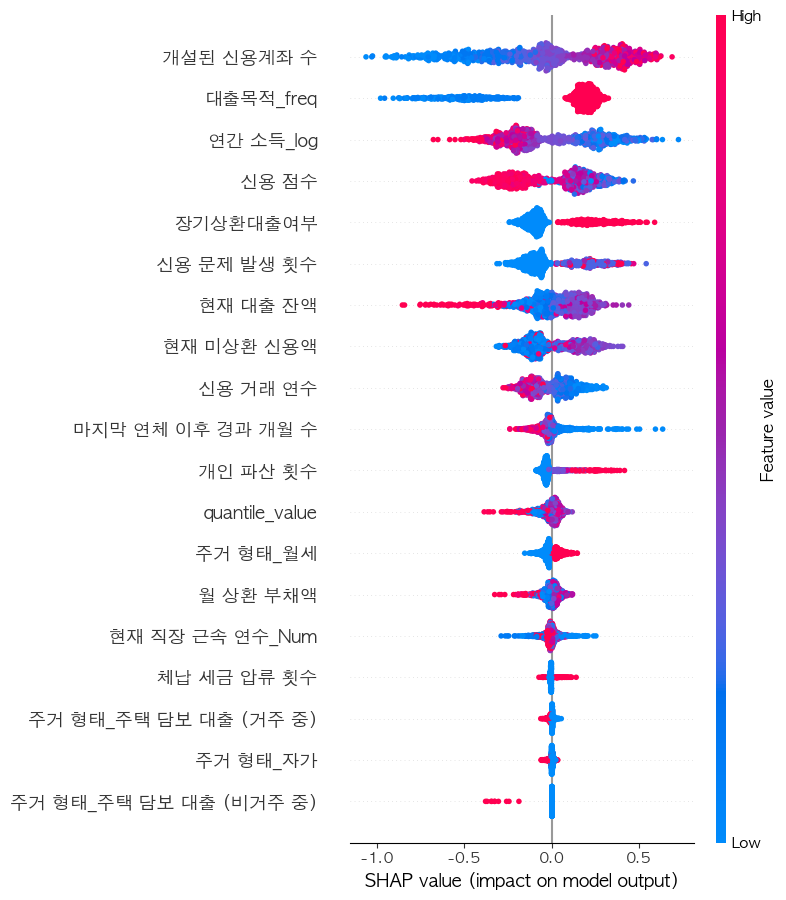

In [126]:
# SHAP (SHapley Additive exPlanations) 라이브러리를 사용해서 피처 중요도를 시각화하는 기본 코드
import shap

# 3. SHAP explainer 만들기 (Tree 기반 모델인 경우 TreeExplainer 사용)
explainer = shap.TreeExplainer(lgb)
# 4. SHAP 값 계산
shap_values = explainer.shap_values(X_test)
# 5. Summary plot으로 전체 feature 중요도 시각화
shap.summary_plot(shap_values, X_test)



In [127]:
# 연관이 없어보이는 컬럼들 몇개 지우고 

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, df['채무 불이행 여부'], 
                                                    stratify=df['채무 불이행 여부'],
                                                    test_size=0.2, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 19), (2000, 19), (8000,), (2000,))

In [129]:
lgb = LGBMClassifier(object='binary',
                     n_estimators=100,
                     early_stopping_rounds = 50,
                     learning_rate=0.03,
                     num_leaves=64, 
                     max_depth=-1, 
                     random_state=42, 
                     verbose=-1)
lgb

LGBMClassifier(early_stopping_rounds=50, learning_rate=0.03, num_leaves=64,
               object='binary', random_state=42, verbose=-1)

In [130]:
lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred_lgb = lgb.predict_proba(X_test)[:,1]

ROC-AUC Score: 0.7424


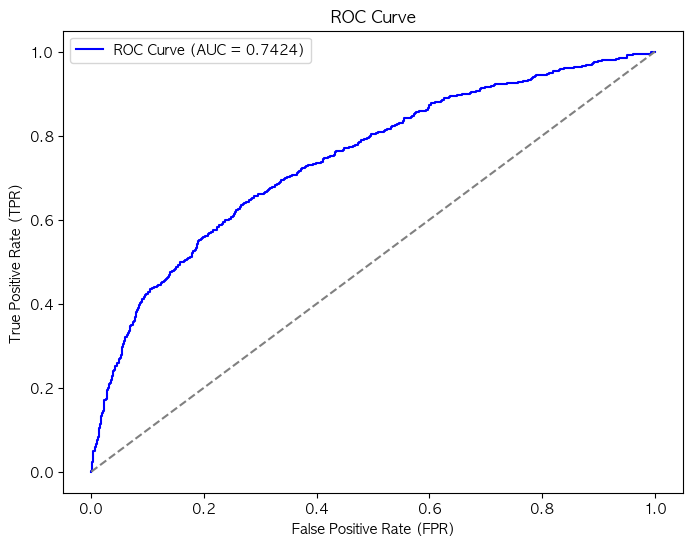

In [131]:
# 실제 값(y_test)와 예측 확률(y_pred_proba)을 사용하여 ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_lgb)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_lgb)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # 랜덤 분류 기준선
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 우우 낮아짐 

In [132]:
# 변수 추가해보기 신용 한도 대비 부채 비율

df['한도비부채율'] = (df['현재 대출 잔액'] + df['현재 미상환 신용액']) / df['최대 신용한도']
df.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,현재 직장 근속 연수_Num,장기상환대출여부,대출 목적_Num,대출목적_freq,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중),연간 소득_log,최대 신용한도_log,boxcox_value,quantile_value,한도비부채율
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0,10.0,0,4,0.7294,0.0,1.0,0.0,0.0,14.478888,12.900715,138.690985,-0.785947,1.538603
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0,10.0,0,4,0.7294,1.0,0.0,0.0,0.0,14.498357,12.795748,134.462401,-0.866169,2.958121
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1,4.0,0,4,0.7294,1.0,0.0,0.0,0.0,14.120331,13.105769,147.329173,-0.581040,1.454782
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1,6.0,0,4,0.7294,1.0,0.0,0.0,0.0,13.863365,12.927679,139.797977,-0.761354,1.614873
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0,2.0,1,4,0.7294,1.0,0.0,0.0,0.0,15.278816,13.704902,175.694263,0.234265,1.387450


In [133]:
df['소득비부채율'] = (df['현재 대출 잔액'] + df['현재 미상환 신용액']) / df['연간 소득']
df.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,현재 직장 근속 연수_Num,장기상환대출여부,대출 목적_Num,대출목적_freq,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중),연간 소득_log,최대 신용한도_log,boxcox_value,quantile_value,한도비부채율,소득비부채율
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0,10.0,0,4,0.7294,0.0,1.0,0.0,0.0,14.478888,12.900715,138.690985,-0.785947,1.538603,0.317493
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0,10.0,0,4,0.7294,1.0,0.0,0.0,0.0,14.498357,12.795748,134.462401,-0.866169,2.958121,0.538990
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1,4.0,0,4,0.7294,1.0,0.0,0.0,0.0,14.120331,13.105769,147.329173,-0.581040,1.454782,0.527447
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1,6.0,0,4,0.7294,1.0,0.0,0.0,0.0,13.863365,12.927679,139.797977,-0.761354,1.614873,0.633540
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0,2.0,1,4,0.7294,1.0,0.0,0.0,0.0,15.278816,13.704902,175.694263,0.234265,1.387450,0.287524


In [134]:
# train 데이터 정리
cols = ['체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', 
          '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
          '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
          '현재 직장 근속 연수_Num', '장기상환대출여부', '대출목적_freq',
          '주거 형태_월세','주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)',
          '연간 소득_log', 'quantile_value', '한도비부채율']
train = df[cols]

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, df['채무 불이행 여부'], 
                                                    stratify=df['채무 불이행 여부'],
                                                    test_size=0.2, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 20), (2000, 20), (8000,), (2000,))

In [136]:
lgb = LGBMClassifier(object='binary',
                     n_estimators=100,
                     early_stopping_rounds = 50,
                     learning_rate=0.03,
                     num_leaves=64, 
                     max_depth=-1, 
                     random_state=42, 
                     verbose=-1)
lgb

LGBMClassifier(early_stopping_rounds=50, learning_rate=0.03, num_leaves=64,
               object='binary', random_state=42, verbose=-1)

ROC-AUC Score: 0.7405


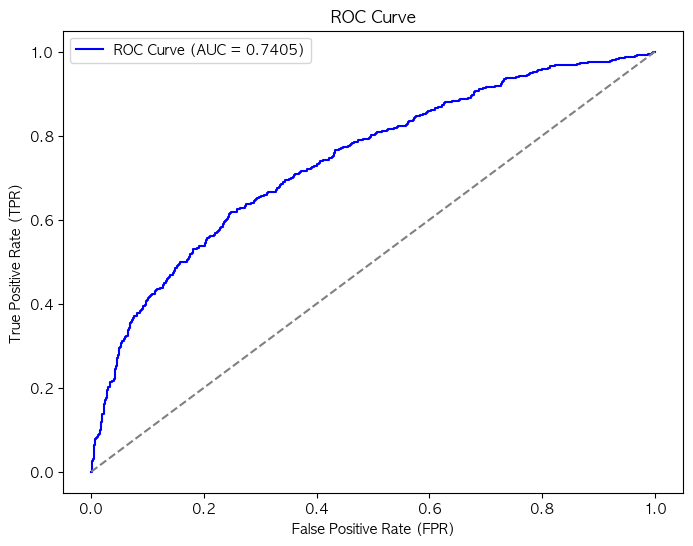

In [137]:
lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred_lgb = lgb.predict_proba(X_test)[:,1]

# 실제 값(y_test)와 예측 확률(y_pred_proba)을 사용하여 ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_lgb)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_lgb)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # 랜덤 분류 기준선
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [138]:
cols = ['연간 소득_log', '현재 직장 근속 연수_Num', '체납 세금 압류 횟수', '개설된 신용계좌 수',
        '신용 거래 연수', 'quantile_value', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
        '대출 목적_Num', '장기상환대출여부', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)']

train = df[cols]

In [139]:
df.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부', '현재 직장 근속 연수_Num', '장기상환대출여부', '대출 목적_Num', '대출목적_freq',
       '주거 형태_월세', '주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)',
       '주거 형태_주택 담보 대출 (비거주 중)', '연간 소득_log', '최대 신용한도_log', 'boxcox_value',
       'quantile_value', '한도비부채율', '소득비부채율'],
      dtype='object')

In [140]:

X_train, X_test, y_train, y_test = train_test_split(train, df['채무 불이행 여부'], 
                                                    stratify=df['채무 불이행 여부'],
                                                    test_size=0.2, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 18), (2000, 18), (8000,), (2000,))

In [141]:
lgb = LGBMClassifier(object='binary',
                     n_estimators=100,
                     early_stopping_rounds = 50,
                     learning_rate=0.03,
                     num_leaves=64, 
                     max_depth=-1, 
                     random_state=42, 
                     verbose=-1)
lgb

LGBMClassifier(early_stopping_rounds=50, learning_rate=0.03, num_leaves=64,
               object='binary', random_state=42, verbose=-1)

ROC-AUC Score: 0.7397


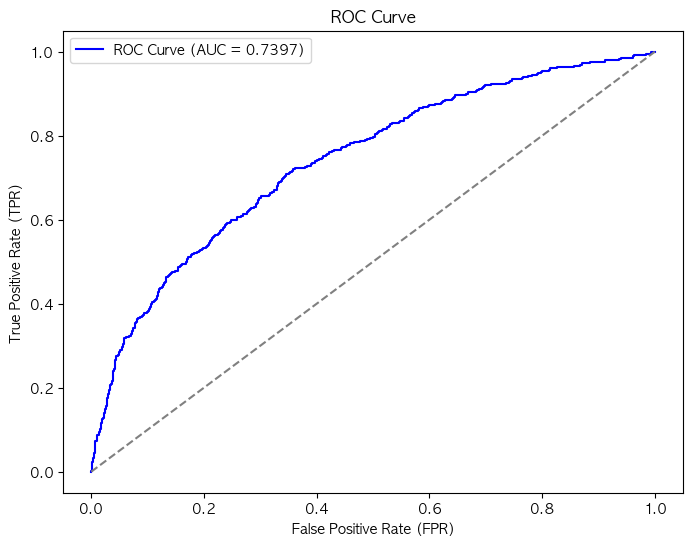

In [142]:
lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred_lgb = lgb.predict_proba(X_test)[:,1]

# 실제 값(y_test)와 예측 확률(y_pred_proba)을 사용하여 ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_lgb)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_lgb)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # 랜덤 분류 기준선
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [143]:
cols = ['개설된 신용계좌 수','대출목적_freq', '연간 소득_log', '신용 점수', '장기상환대출여부', '현재 대출 잔액', '신용 문제 발생 횟수', '현재 미상환 신용액', '신용 거래 연수',
'마지막 연체 이후 경과 개월 수', '개인 파산 횟수']

train = df[cols]

In [144]:

X_train, X_test, y_train, y_test = train_test_split(train, df['채무 불이행 여부'], 
                                                    stratify=df['채무 불이행 여부'],
                                                    test_size=0.2, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

ROC-AUC Score: 0.7359


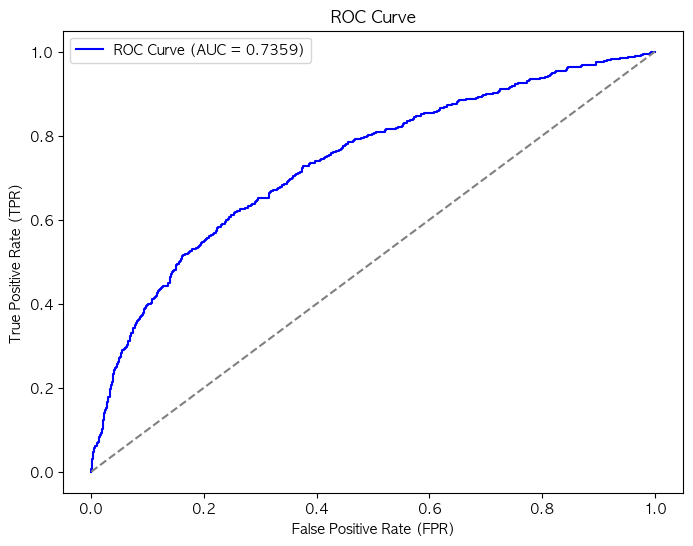

In [145]:
lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred_lgb = lgb.predict_proba(X_test)[:,1]

# 실제 값(y_test)와 예측 확률(y_pred_proba)을 사용하여 ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_lgb)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_lgb)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # 랜덤 분류 기준선
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [146]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 1. 모델 선언
model = LGBMClassifier(random_state=42)

# 2. 하이퍼파라미터 탐색 범위 지정
param_dist = {
    'n_estimators': randint(100, 500),        # 트리 수
    'max_depth': randint(5, 15),              # 트리 최대 깊이
    'learning_rate': uniform(0.01, 0.1),      # 학습률
    'num_leaves': randint(20, 60),            # 리프 수
    'min_child_samples': randint(10, 30),     # 최소 데이터 수 (리프 노드용)
    'subsample': uniform(0.7, 0.3),           # 샘플링 비율
    'colsample_bytree': uniform(0.7, 0.3)     # 피처 샘플링 비율
}

# 3. RandomizedSearchCV 설정
search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,                # 총 시도 횟수
    scoring='roc_auc',        # 분류 성능 평가지표
    cv=5,                     # 5-폴드 교차검증
    n_jobs=-1,                # 병렬 처리
    verbose=1,
    random_state=42
)

# 4. 튜닝 시작
search.fit(X_train, y_train)

# 5. 결과 출력
print("최적 하이퍼파라미터:", search.best_params_)
print("최고 AUC 점수:", search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2184, number of negative: 4216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1319
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.341250 -> initscore=-0.657729
[LightGBM] [Info] Start training from score -0.657729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

# 마지막 피처


In [148]:
df['거래년도비_개설계좌수'] = df['개설된 신용계좌 수']/df['신용 거래 연수']
df.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,현재 직장 근속 연수_Num,장기상환대출여부,대출 목적_Num,대출목적_freq,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중),연간 소득_log,최대 신용한도_log,boxcox_value,quantile_value,한도비부채율,소득비부채율,거래년도비_개설계좌수
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0,10.0,0,4,0.7294,0.0,1.0,0.0,0.0,14.478888,12.900715,138.690985,-0.785947,1.538603,0.317493,0.671642
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0,10.0,0,4,0.7294,1.0,0.0,0.0,0.0,14.498357,12.795748,134.462401,-0.866169,2.958121,0.538990,0.331126
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1,4.0,0,4,0.7294,1.0,0.0,0.0,0.0,14.120331,13.105769,147.329173,-0.581040,1.454782,0.527447,0.638298
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1,6.0,0,4,0.7294,1.0,0.0,0.0,0.0,13.863365,12.927679,139.797977,-0.761354,1.614873,0.633540,1.013514
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0,2.0,1,4,0.7294,1.0,0.0,0.0,0.0,15.278816,13.704902,175.694263,0.234265,1.387450,0.287524,0.421456


In [149]:
# train 데이터 정리
cols = ['체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', 
          '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
          '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
          '현재 직장 근속 연수_Num', '장기상환대출여부', '대출목적_freq',
          '주거 형태_월세','주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)',
          '연간 소득_log', 'quantile_value', '거래년도비_개설계좌수']
train = df[cols]

In [151]:

X_train, X_test, y_train, y_test = train_test_split(train, df['채무 불이행 여부'], 
                                                    stratify=df['채무 불이행 여부'],
                                                    test_size=0.2, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 20), (2000, 20), (8000,), (2000,))

ROC-AUC Score: 0.7418


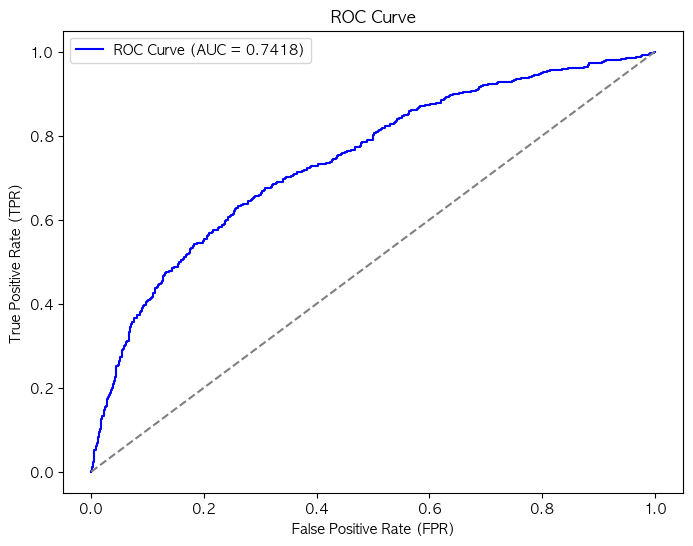

In [152]:
lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred_lgb = lgb.predict_proba(X_test)[:,1]

# 실제 값(y_test)와 예측 확률(y_pred_proba)을 사용하여 ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_lgb)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_lgb)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # 랜덤 분류 기준선
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [155]:
test['거래년도비_개설계좌수'] = test['개설된 신용계좌 수']/test['신용 거래 연수']
test.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,현재 직장 근속 연수_Num,장기상환대출여부,대출 목적_Num,대출목적_freq,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중),연간 소득_log,quantile_value,거래년도비_개설계좌수
0,TEST_0000,월세,1560090.0,10년 이상,0.0,13,12.0,495561.0,0,18,0,기타,단기 상환,376332.0,133522.5,29641.5,736,10.0,0,3,0.0970,1.0,0.0,0.0,0.0,14.260254,-0.571116,1.083333
1,TEST_0001,주택 담보 대출 (거주 중),2102616.0,2년,0.0,9,29.0,580833.0,0,40,0,부채 통합,장기 상환,830379.0,302983.5,20151.0,718,2.0,1,4,0.7294,0.0,0.0,1.0,0.0,14.558693,-0.387826,0.310345
2,TEST_0002,주택 담보 대출 (거주 중),2477989.5,10년 이상,0.0,11,26.5,995841.0,0,44,0,부채 통합,장기 상환,877635.0,379278.0,13113.0,722,10.0,1,4,0.7294,0.0,0.0,1.0,0.0,14.722958,0.423475,0.415094
3,TEST_0003,주택 담보 대출 (거주 중),1571091.0,6년,0.0,7,34.4,601656.0,0,45,0,부채 통합,단기 상환,487278.0,275395.5,11679.0,762,6.0,0,4,0.7294,0.0,0.0,1.0,0.0,14.267281,-0.345618,0.203488
4,TEST_0004,주택 담보 대출 (거주 중),2290260.0,10년 이상,0.0,19,25.0,1954623.0,0,14,0,부채 통합,단기 상환,397782.0,742767.0,42370.5,775,10.0,0,4,0.7294,0.0,0.0,1.0,0.0,14.644176,1.238472,0.760000


In [156]:
test_df = test[cols]
test_df.shape

(2062, 20)

In [157]:
test_df.columns

Index(['체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '신용 문제 발생 횟수',
       '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액',
       '신용 점수', '현재 직장 근속 연수_Num', '장기상환대출여부', '대출목적_freq', '주거 형태_월세',
       '주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)',
       '연간 소득_log', 'quantile_value', '거래년도비_개설계좌수'],
      dtype='object')

In [158]:
pred = pd.Series(lgb.predict_proba(test_df)[:,1])
pred.shape

(2062,)

In [159]:
submit_lgbm1 = pd.read_csv('data/sample_submission.csv')
submit_lgbm1.head()

,UID,채무 불이행 확률
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


In [160]:
submit_lgbm1['채무 불이행 확률'] = pred
submit_lgbm1.shape
submit_lgbm1.to_csv('data/submit_lgbm_채무불이행확률.csv',index=False)

## 변수추가!!!!!

In [162]:
test['소득비부채율'] = (test['현재 대출 잔액'] + test['현재 미상환 신용액']) / test['연간 소득']

test['한도비부채율'] = (test['현재 대출 잔액'] + test['현재 미상환 신용액']) / test['최대 신용한도']
test.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,현재 직장 근속 연수_Num,장기상환대출여부,대출 목적_Num,대출목적_freq,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중),연간 소득_log,quantile_value,거래년도비_개설계좌수,소득비부채율,한도비부채율
0,TEST_0000,월세,1560090.0,10년 이상,0.0,13,12.0,495561.0,0,18,0,기타,단기 상환,376332.0,133522.5,29641.5,736,10.0,0,3,0.0970,1.0,0.0,0.0,0.0,14.260254,-0.571116,1.083333,0.326811,1.028843
1,TEST_0001,주택 담보 대출 (거주 중),2102616.0,2년,0.0,9,29.0,580833.0,0,40,0,부채 통합,장기 상환,830379.0,302983.5,20151.0,718,2.0,1,4,0.7294,0.0,0.0,1.0,0.0,14.558693,-0.387826,0.310345,0.539025,1.951271
2,TEST_0002,주택 담보 대출 (거주 중),2477989.5,10년 이상,0.0,11,26.5,995841.0,0,44,0,부채 통합,장기 상환,877635.0,379278.0,13113.0,722,10.0,1,4,0.7294,0.0,0.0,1.0,0.0,14.722958,0.423475,0.415094,0.507231,1.262162
3,TEST_0003,주택 담보 대출 (거주 중),1571091.0,6년,0.0,7,34.4,601656.0,0,45,0,부채 통합,단기 상환,487278.0,275395.5,11679.0,762,6.0,0,4,0.7294,0.0,0.0,1.0,0.0,14.267281,-0.345618,0.203488,0.485442,1.267624
4,TEST_0004,주택 담보 대출 (거주 중),2290260.0,10년 이상,0.0,19,25.0,1954623.0,0,14,0,부채 통합,단기 상환,397782.0,742767.0,42370.5,775,10.0,0,4,0.7294,0.0,0.0,1.0,0.0,14.644176,1.238472,0.760000,0.498000,0.583514


In [163]:
cols = ['체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', 
          '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
          '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
          '현재 직장 근속 연수_Num', '장기상환대출여부', '대출목적_freq',
          '주거 형태_월세','주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)',
          '연간 소득_log', 'quantile_value', '한도비부채율', '소득비부채율']
train = df[cols]

In [164]:

X_train, X_test, y_train, y_test = train_test_split(train, df['채무 불이행 여부'], 
                                                    stratify=df['채무 불이행 여부'],
                                                    test_size=0.2, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 21), (2000, 21), (8000,), (2000,))

ROC-AUC Score: 0.7386


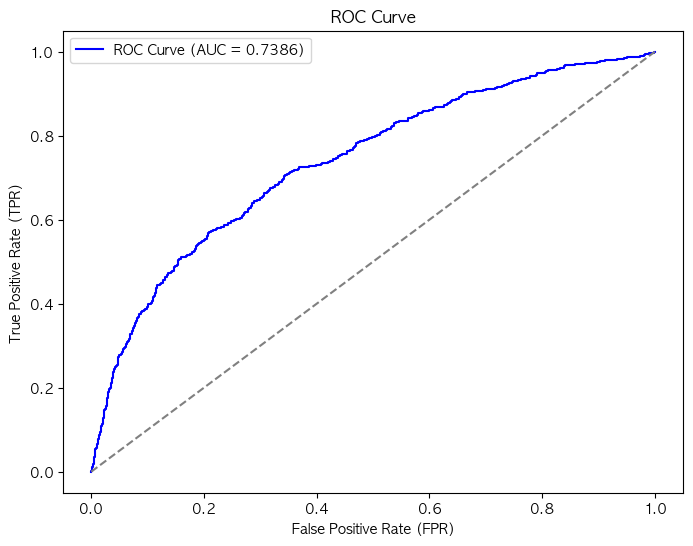

In [165]:
lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred_lgb = lgb.predict_proba(X_test)[:,1]

# 실제 값(y_test)와 예측 확률(y_pred_proba)을 사용하여 ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_lgb)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_lgb)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # 랜덤 분류 기준선
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [166]:
test_df = test[cols]
test_df.shape

(2062, 21)

In [167]:
pred = pd.Series(lgb.predict_proba(test_df)[:,1])
pred.shape

(2062,)

In [168]:
submit_lgbm1 = pd.read_csv('data/sample_submission.csv')
submit_lgbm1.head()

,UID,채무 불이행 확률
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


In [169]:
submit_lgbm1['채무 불이행 확률'] = pred
submit_lgbm1.shape
submit_lgbm1.to_csv('data/submit_lgbm_변수2개추가.csv',index=False)